# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python

from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
from workspace_utils import active_session
import matplotlib.pyplot as plt
%matplotlib inline

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
# initialize the agent and the environment
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)

with active_session():    
    def ddpg(n_episodes=1000, max_t=1000):
        scores_deque = deque(maxlen=100)
        scores_list = []
        scores_movingAvg = []

        for i_episode in range(1, n_episodes+1):
            env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
            states = env_info.vector_observations                  # get the current state (for each agent)
            scores = np.zeros(num_agents)                          # initialize the score (for each agent)
            agent.reset()
            for t in range(max_t):
                actions = agent.act(states)
                env_info = env.step(actions)[brain_name]           # send all actions to tne environment
                next_states = env_info.vector_observations         # get next state (for each agent)
                rewards = env_info.rewards                         # get reward (for each agent)
                dones = env_info.local_done                        # see if episode finished

                agent.step(states, actions, rewards, next_states, dones)
                states = next_states
                scores += rewards

                if np.any(dones):
                    break

            score = np.mean(scores)
            scores_list.append(score)
            scores_deque.append(score)
            scores_movingAvg = np.mean(scores_deque)

#             if i_episode % 1 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, scores_movingAvg))   
            if np.mean(scores_deque) >= 30:
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, scores_movingAvg))
                break

        return scores_list, scores_movingAvg
    
    scores, scoresMovingAvg = ddpg()

Episode 1	Average Score: 6.70
Episode 2	Average Score: 3.40
Episode 3	Average Score: 2.73
Episode 4	Average Score: 2.25
Episode 5	Average Score: 2.08
Episode 6	Average Score: 2.58
Episode 7	Average Score: 2.52
Episode 8	Average Score: 2.49
Episode 9	Average Score: 2.53
Episode 10	Average Score: 2.29
Episode 11	Average Score: 2.39
Episode 12	Average Score: 3.42
Episode 13	Average Score: 3.26
Episode 14	Average Score: 3.19
Episode 15	Average Score: 3.25
Episode 16	Average Score: 3.26
Episode 17	Average Score: 3.34
Episode 18	Average Score: 3.27
Episode 19	Average Score: 3.20
Episode 20	Average Score: 3.20
Episode 21	Average Score: 3.06
Episode 22	Average Score: 3.10
Episode 23	Average Score: 3.34
Episode 24	Average Score: 3.50
Episode 25	Average Score: 3.39
Episode 26	Average Score: 3.47
Episode 27	Average Score: 3.41
Episode 28	Average Score: 3.48
Episode 29	Average Score: 3.43
Episode 30	Average Score: 3.42
Episode 31	Average Score: 3.38
Episode 32	Average Score: 3.34
Episode 33	Averag

Episode 258	Average Score: 17.92
Episode 259	Average Score: 17.64
Episode 260	Average Score: 17.76
Episode 261	Average Score: 17.85
Episode 262	Average Score: 18.04
Episode 263	Average Score: 18.07
Episode 264	Average Score: 18.26
Episode 265	Average Score: 18.37
Episode 266	Average Score: 18.42
Episode 267	Average Score: 18.40
Episode 268	Average Score: 18.34
Episode 269	Average Score: 18.42
Episode 270	Average Score: 18.50
Episode 271	Average Score: 18.27
Episode 272	Average Score: 18.21
Episode 273	Average Score: 18.37
Episode 274	Average Score: 18.51
Episode 275	Average Score: 18.30
Episode 276	Average Score: 18.40
Episode 277	Average Score: 18.63
Episode 278	Average Score: 18.70
Episode 279	Average Score: 19.00
Episode 280	Average Score: 19.12
Episode 281	Average Score: 19.40
Episode 282	Average Score: 19.50
Episode 283	Average Score: 19.59
Episode 284	Average Score: 19.50
Episode 285	Average Score: 19.43
Episode 286	Average Score: 19.38
Episode 287	Average Score: 19.48
Episode 28

Episode 507	Average Score: 29.60
Episode 508	Average Score: 29.72
Episode 509	Average Score: 29.61
Episode 510	Average Score: 29.57
Episode 511	Average Score: 29.66
Episode 512	Average Score: 29.72
Episode 513	Average Score: 29.68
Episode 514	Average Score: 29.58
Episode 515	Average Score: 29.79
Episode 516	Average Score: 29.91
Episode 517	Average Score: 29.97
Episode 518	Average Score: 30.10

Environment solved in 518 episodes!	Average Score: 30.10


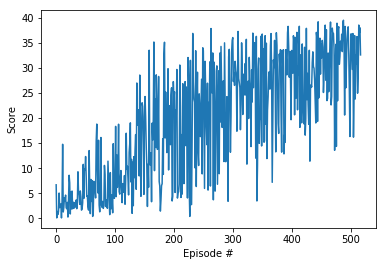

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
# load the weights from file
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth', map_location='cpu'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                      # initialize the score

while True:
    action = agent.act(state, add_noise=True)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations      # get the next state
    reward = env_info.rewards                      # get the reward
    done = env_info.local_done                     # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step                                  
                                     
    if done:
        break 

When finished, you can close the environment.

In [10]:
env.close()